## Observations and Insights

## Dependencies and starter code

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, how ="inner", on = "Mouse ID")
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_mn = data.groupby(by = "Drug Regimen").agg({"Tumor Volume (mm3)": "mean"})
data_mn["Tumor Mean (mm3)"] = data_mn["Tumor Volume (mm3)"]
data_mn = data_mn.drop("Tumor Volume (mm3)", axis =1)
data_mdn = data.groupby(by = "Drug Regimen").agg({"Tumor Volume (mm3)": "median"})
data_mdn["Tumor Median (mm3)"] = data_mdn["Tumor Volume (mm3)"]
data_mdn = data_mdn.drop("Tumor Volume (mm3)", axis =1)
data_var = data.groupby(by = "Drug Regimen").agg({"Tumor Volume (mm3)": "var"})
data_var["Tumor Variance (mm3)"] = data_var["Tumor Volume (mm3)"]
data_var = data_var.drop("Tumor Volume (mm3)", axis =1)
data_std = data.groupby(by = "Drug Regimen").agg({"Tumor Volume (mm3)": "std"})
data_std["Tumor Std Deviation (mm3)"] = data_std["Tumor Volume (mm3)"]
data_std = data_std.drop("Tumor Volume (mm3)", axis =1)
data_sem = data.groupby(by = "Drug Regimen").agg({"Tumor Volume (mm3)": "sem"})
data_sem["Tumor SEM (mm3)"] = data_sem["Tumor Volume (mm3)"]
data_sem = data_sem.drop("Tumor Volume (mm3)", axis =1)
tab = data_mn.merge(data_mdn,how ='inner', on = "Drug Regimen")
tab2 = tab.merge(data_var,how ='inner', on = "Drug Regimen")
tab3 = tab2.merge(data_std,how ='inner', on = "Drug Regimen")
tab4 = tab3.merge(data_sem,how ='inner', on = "Drug Regimen")
final = tab4.sort_values(by = "Tumor Mean (mm3)", ascending = True)
final = final.reset_index()
final

,Drug Regimen,Tumor Mean (mm3),Tumor Median (mm3),Tumor Variance (mm3),Tumor Std Deviation (mm3),Tumor SEM (mm3)
0,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
1,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
2,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
3,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
4,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
5,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
6,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
7,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
8,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
9,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860


## Bar plots

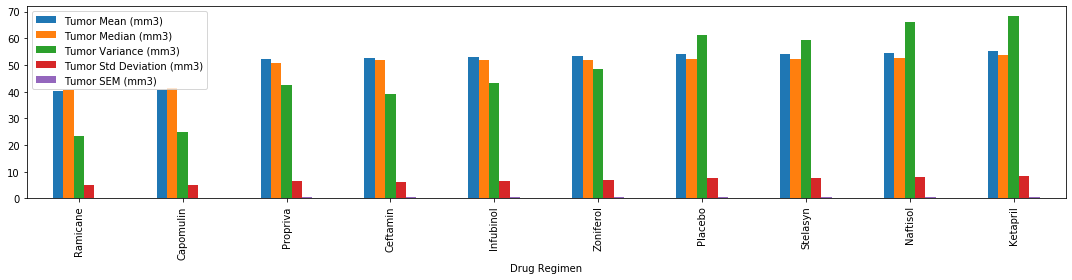

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
title = "Tumor Distribution"
final.plot(x = "Drug Regimen", kind = 'bar',figsize=(15,4))
plt.tight_layout()
plt.show()

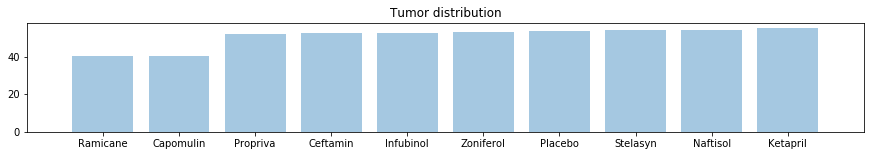

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
fig = plt.figure(figsize=(15, 2))              # Create figure
#tela = ["Tumor Mean (mm3)", "Tumor Median (mm3)", "Tumor Variance (mm3)", "Tumor Std Deviation (mm3)", "Tumor SEM (mm3)"]
plt.bar(final["Drug Regimen"],final["Tumor Mean (mm3)"], alpha=0.4)      # Create bar chart
plt.xlim(-1, len(final["Drug Regimen"]))                 # Set x limits
plt.title("Tumor distribution")            # Set title
plt.show()

## Pie plots

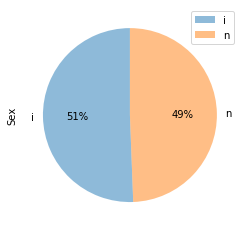

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = data["Sex"].value_counts()
gender = gender.to_frame()
gender = gender.reset_index()
gender
#cond1 = (data["Sex"] == 'Female')
#cond2 = (data["Sex"] == 'Male') 
#f = len(data[cond1])
#m = len(data[cond2])
#sex["Male"]= m
#sex["Female"] = f
#sex.to_frame()
#labels = ['females','males']
#df = pd.DataFrame(raw_data, columns = ['officer_name', 'jan_arrests', 'feb_arrests', 'march_arrests'])
#df['total_arrests'] = df['jan_arrests'] + df['feb_arrests'] + df['march_arrests']

#plt.figure(figsize=(16,8))
# plot chart
#ax1 = plt.subplot(121, aspect='equal')
gender.plot(kind='pie', y = 'Sex', autopct='%1.0f%%',labels='index', startangle=90, wedgeprops={'alpha':0.5})
plt.show()


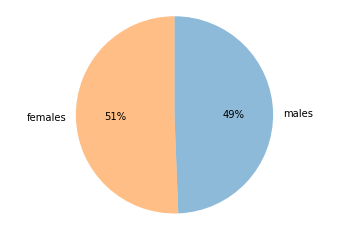

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
cond1 = (data["Sex"] == 'Female')
cond2 = (data["Sex"] == 'Male')
m1 = len(data[cond1])
m2 = len(data[cond2])
sizes =[m1,m2]
labels = ["males","females"]
plt.pie(sizes, labels=labels, autopct="%1.0f%%", counterclock=False, startangle=90, wedgeprops={'alpha':0.5})
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#cols = ["Drug Regimen", "Tumor Volume (mm3)"]
#df = data[cols]
#cond1 = (df["Drug Regimen"].isin(["Ramicane","Capomulin", "Propriva", "Ceftamin"]))
#rami = df[cond1]
#plt.boxplot(rami["Tumor Volume (mm3)"])
#plt.show()
#data["Mouse ID"].value_counts()
#len(data["Mouse ID"].unique()) = 249
data.head()
cols1 = ["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]
df = data[cols1]
sf = df.groupby(by =["Mouse ID", "Drug Regimen"], as_index = False).agg({"Tumor Volume (mm3)" : min})
lf = df.groupby(by =["Mouse ID", "Drug Regimen"], as_index = False).agg({"Tumor Volume (mm3)" : max})
new = sf.merge (lf, on = ["Mouse ID", "Drug Regimen"], how = "inner")
new["Tumor Volume Change"] = new["Tumor Volume (mm3)_y"] - new["Tumor Volume (mm3)_x"]
eff = new.groupby(by =["Drug Regimen"]).agg({"Tumor Volume Change" : "mean"})
eff.sort_values(by = "Tumor Volume Change")
# The most efficient drugs based on the largest change in tumor volume are Ketapril, Naftisol, Stelasyn, Zoniferol
cols2 = ["Mouse ID", "Drug Regimen", "Tumor Volume Change"]
maus = new[cols2]
maus
cond1 = (maus["Drug Regimen"].isin(["Ketapril","Naftisol","Stelasyn","Zoniferol"]))
maus = maus[cond1]

ds = maus["Tumor Volume Change"]
quartiles = ds.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
print(f"The lower quartile of mice tumor change is: {lowerq}")
print(f"The upper quartile of mice tumor change is: {upperq}")
print(f"The interquartile range of mice tumor change is: {iqr}")
print(f"The the median of mice tumor change is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of mice tumor change is: 7.092541954999998
The upper quartile of mice tumor change is: 23.661345474999997
The interquartile range of mice tumor change is: 16.56880352
The the median of mice tumor change is: 17.909440619999998 
Values below -17.760663325 could be outliers.
Values above 48.514550754999995 could be outliers.


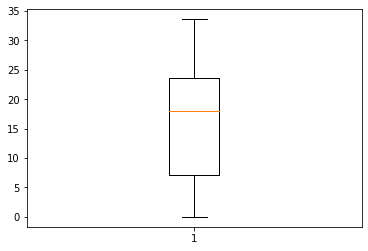

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(maus["Tumor Volume Change"])
plt.show()


## Line and scatter plots

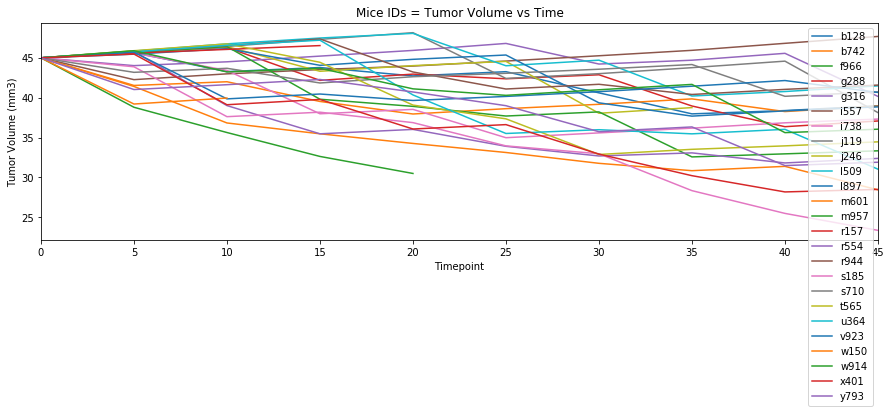

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
data.head()
cols = ["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]
time = data[cols]
cond = (data["Drug Regimen"] == "Capomulin")
time = time[cond]
#time.plot(kind ='line', x = "Timepoint", y = "Tumor Volume (mm3)")
#time["Mouse ID"].value_counts()
time.index = time['Timepoint']
groups = time[['Tumor Volume (mm3)', 'Mouse ID']].groupby('Mouse ID')

fig, ax = plt.subplots()
groups.plot(ax=ax, legend=False, figsize=(15,4))
names = [item[0] for item in groups]
ax.legend(ax.lines, names, loc='best')
plt.ylabel("Tumor Volume (mm3)")
plt.title(label = "Mice IDs = Tumor Volume vs Time")

plt.show()

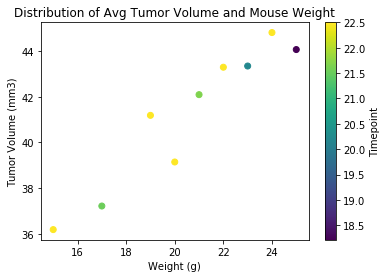

In [54]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
data.head()
cond = (data["Drug Regimen"] == "Capomulin")
df = data[cond]
cols = ["Mouse ID", "Drug Regimen", "Weight (g)", "Tumor Volume (mm3)", "Timepoint"]
df = df[cols]
v1 = df.groupby(by = "Weight (g)", as_index = False).agg({"Tumor Volume (mm3)" : "mean", "Timepoint" : "mean"})
plt.scatter(v1['Weight (g)'], v1['Tumor Volume (mm3)'], c=v1["Timepoint"])
plt.colorbar(label="Timepoint")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title ("Distribution of Avg Tumor Volume and Mouse Weight")
plt.show()

In [52]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
data.head()
cond = (data["Drug Regimen"] == "Capomulin")
df = data[cond]
cols = ["Mouse ID", "Drug Regimen", "Weight (g)", "Tumor Volume (mm3)", "Timepoint"]
df = df[cols]
v1 = df.groupby(by = "Weight (g)", as_index = False).agg({"Tumor Volume (mm3)" : "mean", "Timepoint" : "mean"})
weight = v1["Weight (g)"]
volume = v1["Tumor Volume (mm3)"]
correlation = sts.pearsonr(weight, volume)
print(f"The correlation between both Mouse Weight and Avg tumor volume for Capomulin is POSITIVE with value {round(correlation[0],2)}")

The correlation between both Mouse Weight and Avg tumor volume for Capomulin is POSITIVE with value 0.95


rvalue    = 0.951
r-squared = 0.903


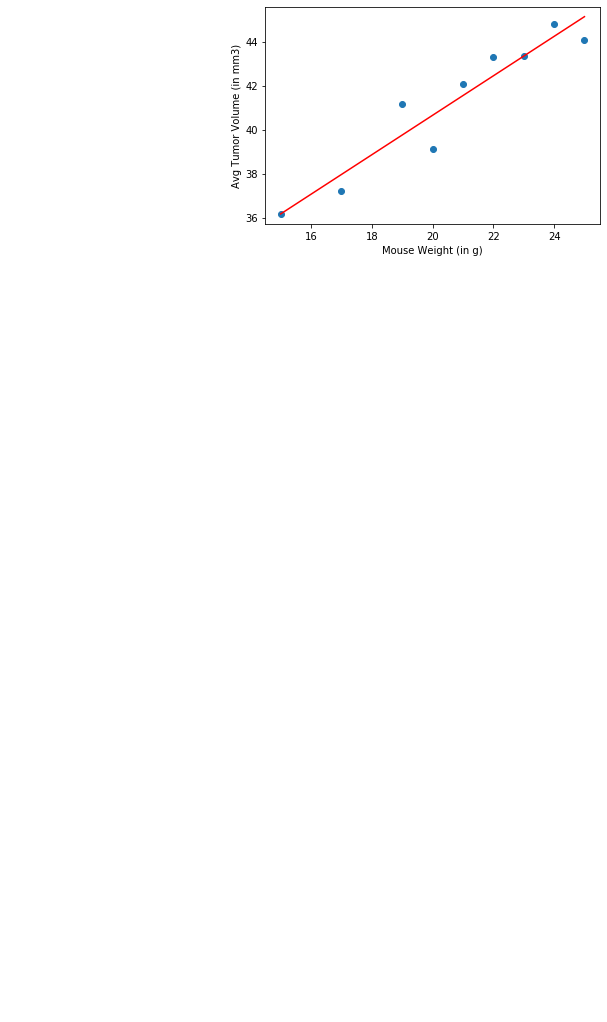

In [56]:
# Add the linear regression equation and line to plot
# And print out the r-squared value along with the plot.
# Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
x_values = v1['Weight (g)']
y_values = v1['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6, 0),fontsize=15,color="red")
plt.xlabel('Mouse Weight (in g)')
plt.ylabel("Avg Tumor Volume (in mm3)")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()